In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 읽기

In [2]:
# CSV 파일 읽기
df = pd.read_csv('./원본 데이터/생체 데이터.csv')

# 2. 데이터의 기본 정보 확인

In [3]:
# 데이터의 첫 6 줄 확인
print(df.head())

   WorkDate  UserCode  Heartbeat  Temperature  Spo2  Latitude  Longitude  \
0  20230803         1         71            0     0       0.0        0.0   
1  20230803         1         71            0     0       0.0        0.0   
2  20230803         1         59            0     0       0.0        0.0   
3  20230803         1         57            0     0       0.0        0.0   
4  20230803         1         56            0     0       0.0        0.0   

                 VitalDate  
0  2023-08-03 10:29:07.398  
1  2023-08-03 10:29:08.442  
2  2023-08-03 10:29:14.393  
3  2023-08-03 10:29:16.379  
4  2023-08-03 10:29:17.377  


In [4]:
# 데이터의 크기 확인
print(df.shape)

(425992, 8)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425992 entries, 0 to 425991
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WorkDate     425992 non-null  int64  
 1   UserCode     425992 non-null  int64  
 2   Heartbeat    425992 non-null  int64  
 3   Temperature  425992 non-null  int64  
 4   Spo2         425992 non-null  int64  
 5   Latitude     425992 non-null  float64
 6   Longitude    425992 non-null  float64
 7   VitalDate    425992 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 26.0+ MB
None


In [6]:
# 기본적인 통계 정보 확인
print(df.describe())

           WorkDate       UserCode      Heartbeat    Temperature  \
count  4.259920e+05  425992.000000  425992.000000  425992.000000   
mean   2.023073e+07      37.037832      80.884331     333.488366   
std    2.955615e+01      55.473705      16.312256     101.847085   
min    2.023071e+07       0.000000       0.000000       0.000000   
25%    2.023071e+07      11.000000      72.000000     361.000000   
50%    2.023072e+07      12.000000      80.000000     364.000000   
75%    2.023073e+07      43.000000      93.000000     367.000000   
max    2.023080e+07     267.000000     192.000000    3540.000000   

                Spo2       Latitude      Longitude  
count  425992.000000  425992.000000  425992.000000  
mean       88.743275      32.638513     119.700528  
std        27.561544       9.139570      33.518105  
min        -1.000000       0.000000       0.000000  
25%        96.000000      35.178095     129.077627  
50%        97.000000      35.179761     129.078393  
75%        98.00

In [7]:
# 수치형 데이터만 선택
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 출력
print(correlation_matrix)

             WorkDate  UserCode  Heartbeat  Temperature      Spo2  Latitude  \
WorkDate     1.000000  0.352506   0.152413     0.179330  0.179101  0.174543   
UserCode     0.352506  1.000000   0.093281     0.197616  0.195428  0.180416   
Heartbeat    0.152413  0.093281   1.000000     0.284320  0.285044  0.273938   
Temperature  0.179330  0.197616   0.284320     1.000000  0.980330  0.905631   
Spo2         0.179101  0.195428   0.285044     0.980330  1.000000  0.890959   
Latitude     0.174543  0.180416   0.273938     0.905631  0.890959  1.000000   
Longitude    0.172684  0.181348   0.273652     0.905478  0.890808  0.999971   

             Longitude  
WorkDate      0.172684  
UserCode      0.181348  
Heartbeat     0.273652  
Temperature   0.905478  
Spo2          0.890808  
Latitude      0.999971  
Longitude     1.000000  


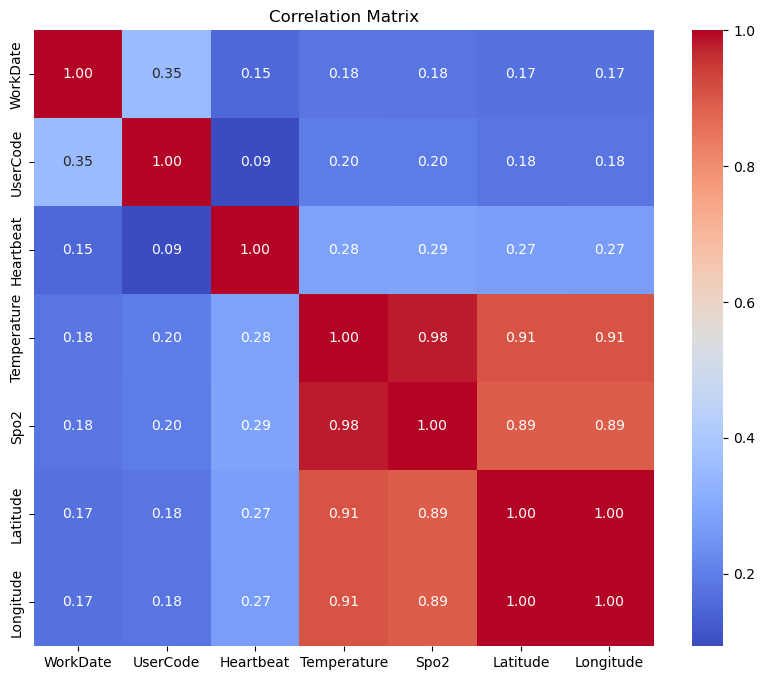

In [8]:
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
# UserCode 개수 확인
usercode_count = df['Heartbeat'].nunique()
usercode_count

127

In [15]:
# 1. 누락된 데이터 확인
missing_data_report = df.isna().sum()

# 2. 모든 값이 0인 열 확인
all_zero_columns = df.columns[(df == 0).all()]

# 3. 유효한 데이터가 없거나 기록이 잘못되 열 출력
print("누락된 데이터가 있는 열:")
print(missing_data_report[missing_data_report > 0])

print("\n모든 값이 0인 열:")
print(all_zero_columns)

누락된 데이터가 있는 열:
Series([], dtype: int64)

모든 값이 0인 열:
Index([], dtype='object')


In [16]:
# 1. 모든 값이 0인 행 필터링
zero_temperature = df[df['Temperature'] == 0]
zero_spo2 = df[df['Spo2'] == 0]
zero_latitude = df[df['Latitude'] == 0]
zero_longitude = df[df['Longitude'] == 0]

# 2. 비정상적인 심박수 데이터 필터링 (예: 심박수가 0인 데이터)
invalid_heartbeat = df[df['Heartbeat'] == 0]

# 결과 출력
print(f"온도 값이 0인 데이터 수: {len(zero_temperature)}")
print(f"Spo2 값이 0인 데이터 수: {len(zero_spo2)}")
print(f"위도 값이 0인 데이터 수: {len(zero_latitude)}")
print(f"경도 값이 0인 데이터 수: {len(zero_longitude)}")
print(f"심박수 값이 0인 데이터 수: {len(invalid_heartbeat)}")

온도 값이 0인 데이터 수: 36242
Spo2 값이 0인 데이터 수: 36363
위도 값이 0인 데이터 수: 30973
경도 값이 0인 데이터 수: 30973
심박수 값이 0인 데이터 수: 420
